# **Lab 4: Predicting FCR with PyCaret**

### **🧪Lab Overview**
* Use PyCaret (v2.1) to predict **First Call Resolution (FCR)** for call center agents.

* FCR shows how well issues are resolved on the first call — **important for saving company costs**.

* **Perform EDA, run regression models, and explore classification** for performance trends.

* Work with a **real-world (sanitized) dataset** from a global BPO company.
---

### **📘 Lab Scenario**

Imagine you're working with a global call center that handles millions of customer queries. The company wants to predict FCR for each employee so it can **improve service quality, reduce costs, and boost customer satisfaction**.

You are provided with **real anonymized data** from a major Business Process Outsourcer (BPO) supporting Fortune 500 clients.

---

### **🎯 Lab Goals**
By the end of this lab, you will be able to:

* **Build and evaluate** a regression model using PyCaret.

* **Predict** the FCR score for a given employee.

* **Understand** how this prediction can be used to enhance performance management.

* **Explore** how machine learning can be applied to real business problems.

---

### **🧠 Key Concepts (for Beginners)**

🔹 **First Call Resolution (FCR)**: FCR shows whether a customer’s issue was solved in the first call. Higher FCR = better support = lower cost.

🔹 **Regression**: A type of machine learning used to predict numbers (e.g., FCR score). It’s like drawing a best-fit line to estimate future values.

🔹 **Exploratory Data Analysis (EDA)**: EDA helps us understand the dataset before modeling. We explore trends, missing values, and patterns.

🔹 **PyCaret**: An easy-to-use ML library that automates model training, evaluation, and deployment with just a few lines of code.

---

### **Step 1: Install Seaborn Library 📦✨**

We need to install Seaborn to create nice and easy-to-understand charts for our data.

#### **📘 Explanation:**
- **Seaborn** is a Python library that helps in making colorful and attractive graphs.
- It is built on **top of Matplotlib** but is easier to use and gives cleaner results.
- We mostly use Seaborn for **visualizing patterns, trends, and relationships** in our data.

#### **🔑 Key Concepts:**
- ```!pip install seaborn```: This command installs Seaborn into your Python environment.

- **Seaborn**: A tool for making professional-looking graphs quickly and easily.

#### **✅ Result:**
Seaborn gets installed successfully and you can now use it to make graphs! 🎨



In [36]:
!pip install seaborn

### **Step 2: Check Seaborn Installation 📋🔍**
We will check if Seaborn was installed properly.

#### **📘 Explanation:**
- The command ```!pip show seaborn``` displays important information about the Seaborn library.
- It shows the **version, location** where it's installed, and other details.
- This helps us **confirm** that Seaborn is ready to use before we move forward.

- ✅ It’s like a small health check for the library!

#### **🔑 Key Concepts:**
- ```!pip show```: Shows details of any installed Python package.

- **Version**: Tells which version of Seaborn is installed.

- **Location**: Tells where the library files are saved.

#### **✅ Result:**
You will see Seaborn’s version, location, and other info printed below. 📄

In [37]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\Hello\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


### **Step 3: Check Python Path 📍🐍**
We will find out where the current Python is installed on your system.

#### **📘 Explanation:**

- The command ```print(sys.executable)``` shows the **exact path** of the Python version you are using.
- This is important if you have **multiple Python versions** installed.
- It helps to **make sure** that your libraries are installed in the correct Python environment.

- **🧠 Useful when setting up Jupyter, Gradio, or any ML project!**

#### **🔑 Key Concepts:**
- ```sys.executable```: Tells the location of the Python interpreter you are running.

- **Why Important?**: To avoid confusion between different Python installations.

#### **✅ Result:**
The path to your Python installation will be printed. Example: ```/usr/bin/python3``` or ```C:\Python\python.exe``` 🛤️

In [38]:
import sys
print(sys.executable)

C:\Users\Hello\myenv\Scripts\python.exe


### **Step 4: Import Important Libraries 🛠️📚**
We are bringing in the libraries that will help us with data handling, visualization, and warnings.

#### **📘 Explanation:**
- **Numpy** helps in doing fast math operations on data.

- **Pandas** lets us work with tables (rows and columns) easily.

- **Seaborn and Matplotlib** are used for making graphs and charts look nice.

- **Warnings** are turned off to keep the notebook clean.

- **Sklearn’s set_config** is used to display machine learning pipelines in an easy-to-read format.

- ✅ This setup makes the notebook ready for data analysis and ML modeling!

#### **🔑 Key Concepts:**
- ```numpy```: For numbers and math operations.

- ```pandas```: For handling tables of data.

- ```seaborn```: For beautiful charts.

- ```warnings.filterwarnings('ignore')```: To hide unnecessary warning messages.

- ```set_config(display='text')```: Makes ML pipelines display in text form instead of complex graphs.

#### **✅ Result:**
All the important libraries are imported, and your notebook is ready for smooth work! ✨

### **⚠️ Note:**
For this code:
➔ **No output** because you are just importing libraries and setting configurations — they don’t print anything by default. ⚙️

In [40]:
# Import libraries for data processing.
import numpy as np       # For numerical operations
import pandas as pd      # For working with datasets (rows & columns)
import seaborn as sns    # Import Seaborn for data visualization
import warnings          # To suppress warnings and handle timing
import time
warnings.filterwarnings('ignore')

# Import libraries for visualization and set default values.
import matplotlib.pyplot as plt            # For creating graphs
import seaborn as sns                      # High-level plots with easy syntax
# Use the seaborn style with the 'darkgrid' context
sns.set_theme(style="darkgrid")            # Use a pleasant theme for better visuals
# or another available seaborn style

from sklearn import set_config
set_config(display='text')                 # Display pipeline steps in text format

### **Step 5: Install PyCaret and Required Libraries 📦🔧**

We need to ensure the necessary libraries are installed and upgraded for a smooth setup.

#### **📘 Explanation:**

- **Library Installation**: We install PyCaret, SciPy, Evidently, and imbalanced-learn to make sure we have the correct versions.

- **PyCaret Setup**: PyCaret is uninstalled and reinstalled to ensure a fresh and compatible installation.

- **Package Upgrades**: We also upgrade pip, setuptools, and wheel to ensure the environment is up-to-date.

#### **🔑 Key Concepts:**

- ```!pip install```: Installs Python libraries needed for the project.

- ```!python -m pip install --upgrade```: Upgrades existing libraries like pip, setuptools, and wheel.

- ```scipy>=1.10.0```: Ensures the correct version of SciPy is installed, compatible with other libraries.

#### **✅ Result:**

Libraries are installed and upgraded successfully. Your environment is ready for the project, and you can now move forward with your analysis and modeling! 🌟



In [41]:
!pip install pycaret --quiet
!pip install scipy>=1.10.0
!pip install --upgrade evidently imbalanced-learn
!python -m pip install --upgrade pip setuptools wheel

### **Step 6: Data Processing and Model Setup**

#### **Import Libraries for Data Processing** 📚
We start by importing necessary libraries for data processing and visualization.

- **Warnings**: Suppress unnecessary warnings 🚫.
- **Matplotlib & Seaborn**: For plotting and styling 📊.
- **Scikit-learn**: For machine learning algorithms and configuration 🤖.
- **PyCaret**: For setting up regression experiments and automating model selection 🔧.

#### **Dataset Overview** 📋
- **Dataset Source**: The dataset is loaded from a URL into a pandas DataFrame 📥.
- **Shape**: Display the number of rows and columns in the dataset 📐.
- **Preview**: View the first 5 rows of the dataset to understand its structure 👀.

#### **Dataset Exploration** 🔍
- **Column Names**: Print all column names to identify the target column 📝.
- **Descriptive Statistics**: Display summary statistics for each feature 📊.
- **Correlation Matrix**: Visualize relationships between features using a heatmap 🔥.

#### **Identify Target Column** 🎯
- **Target Column**: Look for the correct column to predict (e.g., 'Performance_Rating' or 'performance_rating').

#### **PyCaret Setup** 🛠️
  - **PyCaret Setup**: Initialize PyCaret with the dataset and selected target column 🔄.
  - **Normalization**: Normalize features for better performance ⚖️.
  - **Transformation**: Apply transformations to enhance data quality 🌀.
  - **Feature Ignoring**: Ignore unnecessary features like 'Employee_ID' 🚫.

#### **Model Training and Evaluation** 🏆
- **Model Comparison**: PyCaret automatically compares multiple models and selects the best one 🏅.
- **Final Model**: Train the best model and evaluate its performance 📈.
- **Feature Importance**: Plot which features contribute most to the model’s predictions 📊.
- **Predictions**: Generate and view predictions for new data 🔮.

#### **Conclusion** 🎉
- **Best Model**: The final model is the best performing model based on PyCaret’s automatic selection.


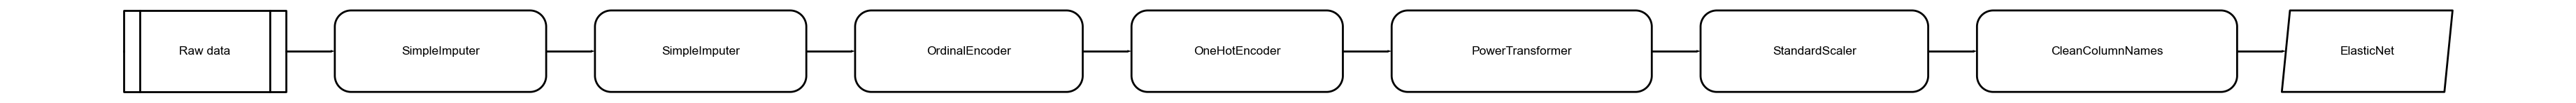

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

None


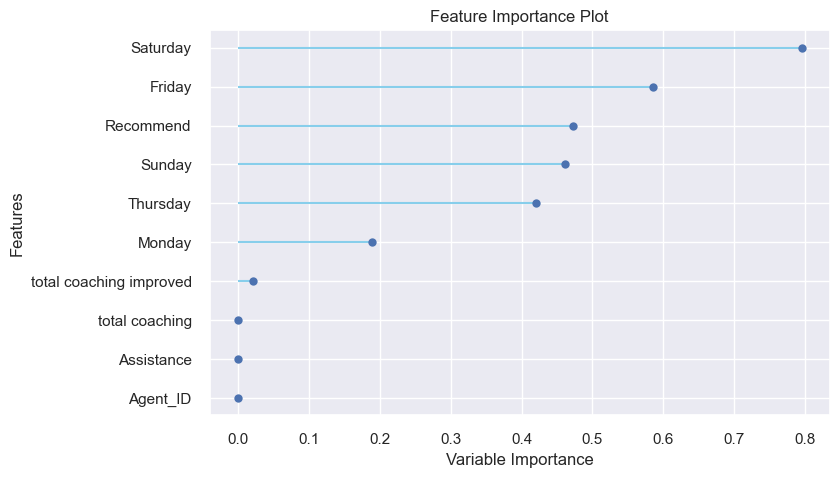

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,3.2758,14.6981,3.8338,-0.1710,0.0395,0.0336


    Agent_ID      Friday      Monday    Saturday      Sunday    Thursday  \
8     385472   93.548386   92.857140   94.572647   94.572647   93.103447   
71    383173  100.000000  100.000000  100.000000  100.000000  100.000000   
89    382952   92.000000  100.000000  100.000000   94.555557   92.000000   
28    368079  100.000000  100.000000  100.000000   98.255333   93.103447   
63    377533  100.000000   93.548386   95.281540   95.348839   91.836731   

       Tuesday   Wednesday          Site Function_Field  tenure  \
8    95.918365   97.435898  Kuala Lumpur          Agent      25   
71  100.000000  100.000000  Kuala Lumpur          Agent       9   
89  100.000000   83.333336  Kuala Lumpur          Agent       7   
28  100.000000   96.428574  Kuala Lumpur          Agent      17   
63   95.833336   95.121948  Kuala Lumpur          Agent      10   

    Total number of calls  Assistance  Recommend      CSat  total coaching  \
8                     303   94.684387  92.413795  4.732673    

In [89]:
# Import libraries for data processing
import warnings
warnings.filterwarnings('ignore')

# For Jupyter users, ensure inline plotting
%matplotlib inline

# Make sure we have the right packages installed
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    !pip install numpy pandas matplotlib seaborn

# Set up visualization style
sns.set_theme(style="darkgrid")

# For sklearn text display
try:
    from sklearn import set_config
    set_config(display='text')
except ImportError:
    !pip install scikit-learn
    from sklearn import set_config
    set_config(display='text')

# Try to import PyCaret 3.x (modern version)
try:
    from pycaret.regression import *
    print("PyCaret is already installed")
except ImportError:
    # Install PyCaret with minimal dependencies to avoid compilation issues
    !pip install pycaret[minimal] --quiet
    from pycaret.regression import *

# Check PyCaret version
from pycaret.utils import version
print('PyCaret Version:', version())

# Load Dataset
url = 'https://raw.githubusercontent.com/aliagowani/Pycaret_2.1_Regression_EmployeePerformance/master/employee_performance.csv'
dataset = pd.read_csv(url)

# Check shape of dataset and view first few observations
print("Shape of dataset (observations, features):", dataset.shape)
print("First 5 rows of the dataset:")
print(dataset.head(5).round(2))

# Print all column names to identify the correct target column
print("\nAvailable columns in the dataset:")
print(dataset.columns.tolist())

# Describe the features in the dataset
print("\nDescriptive Statistics of the dataset:")
print(dataset.describe().round(2))

# Create a correlation matrix (exclude non-numeric columns)
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset_corr = dataset[numeric_cols].corr().round(4)

# Create a mask for the correlation matrix
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask)] = True

# Generate the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dataset_corr, mask=mask, vmax=1, center=0, vmin=-1,
            square=True, cmap='PuOr', linewidths=.5,
            annot=True, annot_kws={"size": 12}, fmt='.1f')
plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

# First check the correct name of the target column
# Since we got the error that 'Performance_Rating' doesn't exist
if 'Performance_Rating' in dataset.columns:
    target_col = 'Performance_Rating'
elif 'performance_rating' in dataset.columns:
    target_col = 'performance_rating'
else:
    # Find potential target columns - looking for columns with "performance" or "rating"
    potential_targets = [col for col in dataset.columns if 'performance' in col.lower() or 'rating' in col.lower()]
    if potential_targets:
        target_col = potential_targets[0]
        print(f"Using '{target_col}' as the target column")
    else:
        # If no obvious target column, use the last column as a fallback
        target_col = dataset.columns[-1]
        print(f"No performance rating column found. Using '{target_col}' as the target column")

# If using PyCaret 3.x, setup the regression experiment
print(f"\nSetting up PyCaret with target column: {target_col}")
reg_setup = setup(data=dataset, 
                 target=target_col,
                 session_id=123,
                 normalize=True,
                 transformation=True,
                 ignore_features=['Employee_ID'] if 'Employee_ID' in dataset.columns else None)

# Compare models
best_model = compare_models()

# Create and evaluate the model
final_model = create_model(best_model)
print(evaluate_model(final_model))

# Plot feature importance
plot_model(final_model, plot='feature')

# Generate predictions
predictions = predict_model(final_model)
print(predictions.head())

# Print conclusion
print("\nModel Analysis Complete! The best performing model is:")
print(best_model)

### **Step 7: Load the Dataset 📥📊**
We are now loading the dataset into our notebook from a remote source.

#### **📘 Explanation:**
- **Dataset URL**: We are loading the dataset from an online URL using **Pandas**.

- ```pd.read_csv()```: This function fetches the dataset from the URL and converts it into a **Pandas DataFrame**.

- **Preview**: We will use ```.head()``` to view the first few rows and ```.describe()``` to get a summary of the dataset's features.

#### **🔑 Key Concepts:**
- ```pd.read_csv(url)```: Reads a CSV file from a given URL and loads it into a Pandas DataFrame.

- ```dataset.head()```: Displays the first 5 rows of the dataset.

- ```dataset.describe()```: Summarizes the dataset with statistics like mean, standard deviation, and range.

#### **✅ Result:**
- The dataset is successfully loaded.
- A preview and summary of the data will be displayed.

In [43]:
# Load Dataset
url = 'https://raw.githubusercontent.com/aliagowani/Pycaret_2.1_Regression_EmployeePerformance/master/employee_performance.csv'
dataset = pd.read_csv(url)

# Display the first few rows of the dataset
print(dataset.head())

# Display the summary statistics of the dataset
print(dataset.describe())

   Agent_ID      Friday      Monday   Saturday     Sunday    Thursday  \
0    384091  100.000000   90.000000  90.000000  96.145833  100.000000   
1    369185   94.000000  100.000000  96.865528  96.865528   96.103896   
2    360854   94.444444   80.000000  92.936027  92.936027  100.000000   
3    374407  100.000000   95.000000  96.630435  96.630435   92.500000   
4    372496   96.875000   95.833333  94.278101  94.278101   83.333333   

     Tuesday   Wednesday          Site Function_Field  tenure  \
0  96.875000  100.000000  Kuala Lumpur          Agent      33   
1  95.890411   98.333333  Kuala Lumpur          Agent      33   
2  93.939394   96.296296  Kuala Lumpur          Agent      32   
3  95.652174  100.000000  Kuala Lumpur          Agent      32   
4  95.348837  100.000000  Kuala Lumpur          Agent      29   

   Total number of calls  Assistance  Recommend      CSat  total coaching  \
0                    163   95.061728  94.230769  4.865031               0   
1               

### **Step 8: Check Dataset Shape and View First Few Observations 🔍📊**
We will confirm that the dataset is loaded correctly and inspect the first few records.

#### **📘 Explanation:**
- Dataset Shape: The **dataset.shape** command returns the number of rows (observations) and columns (features) in the dataset.

- Preview Data: **dataset.head(5)** will display the first five rows of the dataset to ensure that the data is loaded correctly. The **.round(2)** will round the values to two decimal places for better readability.

#### **🔑 Key Concepts:**
- ```dataset.shape:``` Provides the dimensions (rows, columns) of the dataset.

- ```dataset.head(5):``` Displays the first 5 rows of the dataset.

#### **✅ Result:**
- The shape of the dataset will be printed, confirming the number of observations and features.
- The first 5 rows will be displayed, providing a quick preview of the data to ensure it loaded correctly.

In [44]:
# Check shape of dataset and view first few observations to ensure data loaded correctly.
print("Shape of dataset (observations, features):", dataset.shape)
dataset.head(5).round(2)

Shape of dataset (observations, features): (102, 19)


,Agent_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Site,Function_Field,tenure,Total number of calls,Assistance,Recommend,CSat,total coaching,total coaching improved,Actual Value,FCR Week before
0,384091,100.00,90.00,90.00,96.15,100.00,96.88,100.00,Kuala Lumpur,Agent,33,163,95.06,94.23,4.87,0,0,85.71,97.14
1,369185,94.00,100.00,96.87,96.87,96.10,95.89,98.33,Kuala Lumpur,Agent,33,306,95.08,94.67,4.83,0,0,100.00,88.64
2,360854,94.44,80.00,92.94,92.94,100.00,93.94,96.30,Kuala Lumpur,Agent,32,138,94.16,94.74,4.82,2,1,80.00,92.31
3,374407,100.00,95.00,96.63,96.63,92.50,95.65,100.00,Kuala Lumpur,Agent,32,148,98.65,95.83,4.84,0,0,94.44,100.00
4,372496,96.88,95.83,94.28,94.28,83.33,95.35,100.00,Kuala Lumpur,Agent,29,142,97.18,98.55,4.86,0,0,100.00,90.91


### **Step 9: Describe Features in the Dataset 📊🔍**
We will examine the statistical summary of the dataset to understand the distribution and properties of each feature.

#### **📘 Explanation:**
- ```dataset.describe()```: This method provides summary statistics for the dataset. It includes the count (number of non-null values), mean, standard deviation, minimum, and maximum values for each feature.

- ```.round(2)```: This rounds the numerical values to two decimal places for better readability.

#### **🔑 Key Concepts:**
- ```dataset.describe()```: Gives a summary of the numerical features in the dataset.

- ```round(2)```: Ensures the summary statistics are displayed with 2 decimal places.

#### **✅ Result:**
You will see a table displaying summary statistics for each feature in the dataset, helping to assess the distribution and range of values for each feature.

In [45]:
# Below is a high-level description of each feature. The data set is comprised of 102 agents and we have 19 features to evaluate. The data is between the time period of June 1, 2020 and July 31, 2020, with the 'Actual Value' as the Actual FCR value of each agent for August 7, 2020. The goal is to create a model that predicts the FCR for an employee can have at the end of the week (Friday).

# 'Agent_ID': unique identifier of the employee or agent.
# 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday': shows the FCR percent for each agent as an aggregate (mean). The higher the percentage the higher the rate at which the customer's issue was resolved in the first call.
# 'Site': city location of the call center.
# 'Function_Field': this is the role of the employee. In our case, it should all be Agents.
# 'tenure': tenure of the agent at the company in months.
# 'Total number of calls': number of all phone calls taken by the agent in the given timeframe.
# 'Assistance': percentage of time the agent needed to provide additional assistance by escalating to supervisor.
# 'Recommend': percentage of time the agent would be recommended by the customer to resolve an issue.
# 'CSat': average survey response (on a scale from 1 (least satisfied) to 5 (most satisfied)) that the customer was satisfied with the experience.
# 'total coaching': number of times the agent received coaching sessions from supervisor to improve FCR metric in the given timeframe.
# 'total coaching improved': number of times the agent's FCR value increased after a week from the initial coaching.
# 'Actual Value': the label we are trying to predict. It is the next Friday (August 7, 2020) FCR value for the agent.
# 'FCR Week before': a strong indicator is how well the agent performed the previous Friday. This is the FCR value for the Friday before the predicted value ('Actual Value').

# Describe the features in the dataset, such as, count, mean, standard deviation, min, max, etc.
dataset.describe().round(2)

,Agent_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,tenure,Total number of calls,Assistance,Recommend,CSat,total coaching,total coaching improved,Actual Value,FCR Week before
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,371097.88,95.65,94.10,95.55,95.19,94.91,94.97,96.54,14.24,173.94,95.83,95.62,4.81,1.61,0.88,96.04,95.58
std,10742.44,4.36,10.47,3.56,3.94,5.45,4.68,3.83,6.85,77.23,1.78,2.00,0.09,1.78,1.07,5.70,4.67
min,353039.00,77.78,0.00,80.56,80.00,75.00,80.00,83.33,3.00,52.00,89.66,87.16,4.41,0.00,0.00,75.00,80.00
25%,362108.00,93.75,92.45,93.87,93.28,92.31,92.94,95.00,8.00,116.25,94.71,94.67,4.77,0.00,0.00,94.12,92.92
50%,371781.00,96.15,94.94,95.83,96.01,96.00,95.86,97.33,15.00,158.00,95.81,95.59,4.82,1.00,1.00,100.00,96.49
75%,380697.75,100.00,100.00,97.56,97.57,100.00,98.15,100.00,17.00,226.25,96.99,97.11,4.87,2.00,1.00,100.00,100.00
max,388627.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,33.00,388.00,100.00,100.00,4.98,9.00,4.00,100.00,100.00


### **Step 10: Create and Visualize Correlation Matrix 🔍💡**
In this step, we are going to explore how different features in the dataset are related to each other using a correlation matrix. Then, we will visualize it using a heatmap to get a clearer picture.

#### **📘 Explanation:**
- **What is Correlation?**
**Correlation** shows how two features are connected:

  - **Positive Correlation**: As one feature increases, the other also increases.
  
  - **Negative Correlation**: As one feature increases, the other decreases.
  
  - **No Correlation**: No relationship between the two features.

We use this information to decide which features might be important for making predictions.

- **Extracting Numeric Features:**
We focus on **numeric columns** (like integers or decimals) since correlation only works with numbers.

  - ```dataset.select_dtypes(include=['float64', 'int64'])```: This grabs only the numeric columns.

- **Creating the Correlation Matrix:**
A **correlation matrix** is a table that shows how strongly each feature is related to the others.

    - Values close to 1: Strong positive correlation.

    - Values close to -1: Strong negative correlation.

    - Values around 0: No relationship.

- **Masking the Upper Half:**
We hide the **upper half** of the matrix because it just repeats the lower half (like a mirror image). This makes the matrix cleaner and easier to read.

- **Visualizing with a Heatmap:**
The **heatmap** turns the matrix into a visual chart, where:

  - **Dark Colors** = Strong relationships (either positive or negative).

  - **Light Colors** = Weak relationships.

This helps us **quickly spot which features are strongly related** and might help our prediction model.

#### **🔑 Key Concepts:**
- **Correlation**: Tells us how features are related (positive, negative, or neutral).

- **Heatmap**: A color-coded chart showing the strength of relationships between features.

- ```sns.heatmap()```: This tool is used to draw the heatmap from the correlation matrix.

#### **✅ Result:**
- **You will see a color-coded heatmap** where each square shows the relationship between two features.

    - **Strong relationships** will appear as dark colors (either dark red or blue).

    - **Weak or no relationships** will appear as light colors.

This step helps us **visualize important relationships** between features, guiding us in choosing which features to focus on when building our prediction model. 🌟

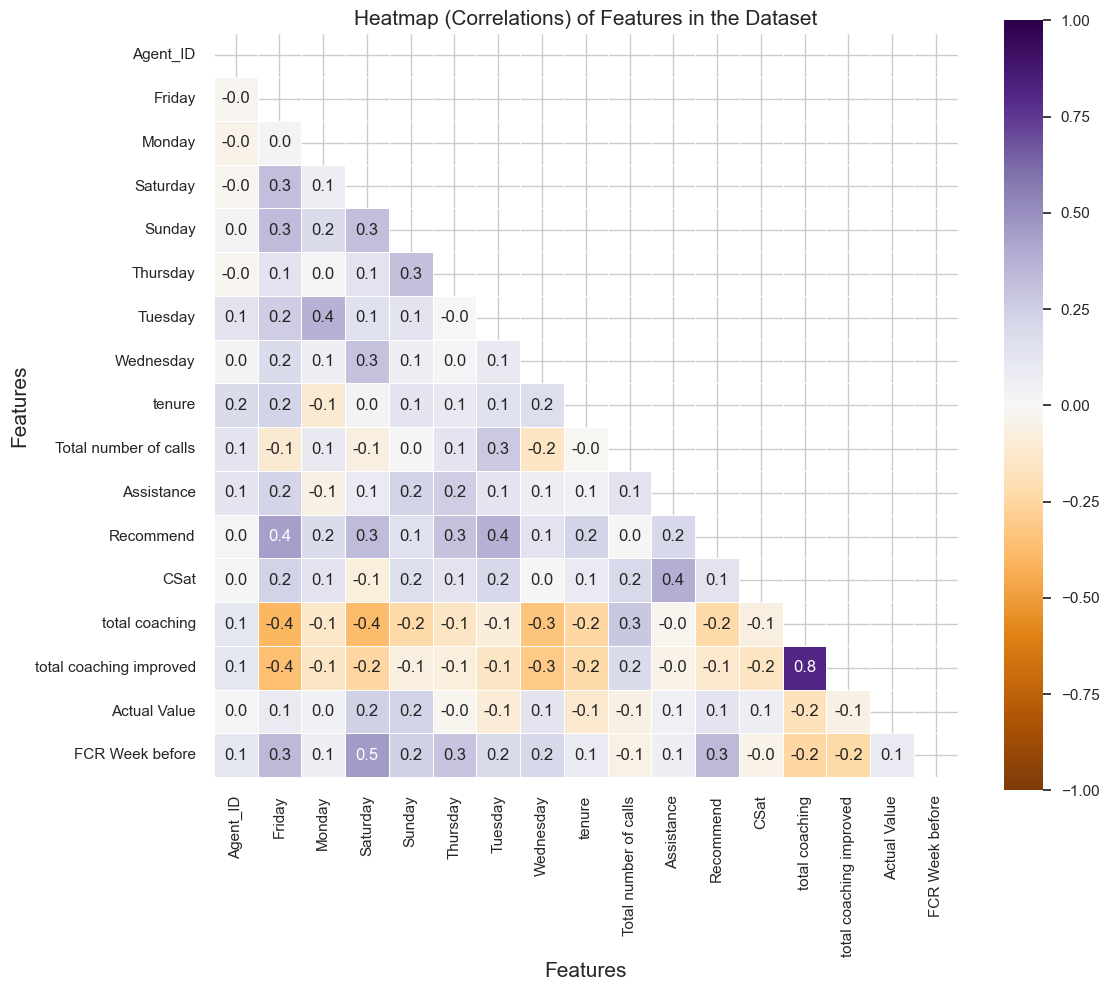

In [46]:
# Create a correlation for the dataset (exclude non-numeric columns)
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset_corr = dataset[numeric_cols].corr().round(4)

# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the correlation matrix (heatmap) using Seaborn
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center=0, vmin=-1,
                     square=True, cmap='PuOr', linewidths=.5,
                     annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()


### **Step 11: Visualize FCR Distribution for Each Day 📊**
We visualize the **First Call Resolution (FCR)** for each day of the week using a probability density chart. This helps us understand the distribution of FCR values for each day.

#### **📘 Explanation:**
- **FacetGrid**: A Seaborn grid used to plot multiple KDE plots for each day of the week.

- **KDE Plots**: Kernel Density Estimate (KDE) plots represent the distribution of the **FCR** values for each day of the week. These plots help visualize the probability density.

- **Color Coding**: Each day is assigned a different color for better differentiation:

  - Sunday: **#4E79A7**

  - Monday: **#F28E2B**

  - Tuesday: **#59A14F**

  - Wednesday: **#E15759**

  - Thursday: **#B6992D**

  - Friday: **#499894**

  - Saturday: **#B07AA1**

- **xlim**: The x-axis limit is set to the maximum value of Thursday to ensure all values fit in the chart.

#### **🔑 Key Concepts:**
- **FacetGrid**: Used to map KDE plots for multiple features.

- **KDE Plot**: Visualizes the distribution of the **FCR** values across different days.

- **Color Mapping**: Assigns unique colors to each day to distinguish them in the plot.

#### **✅ Result:**
You will see a probability density plot that shows how the FCR values are distributed for each day of the week, allowing you to identify trends and patterns. 🌟



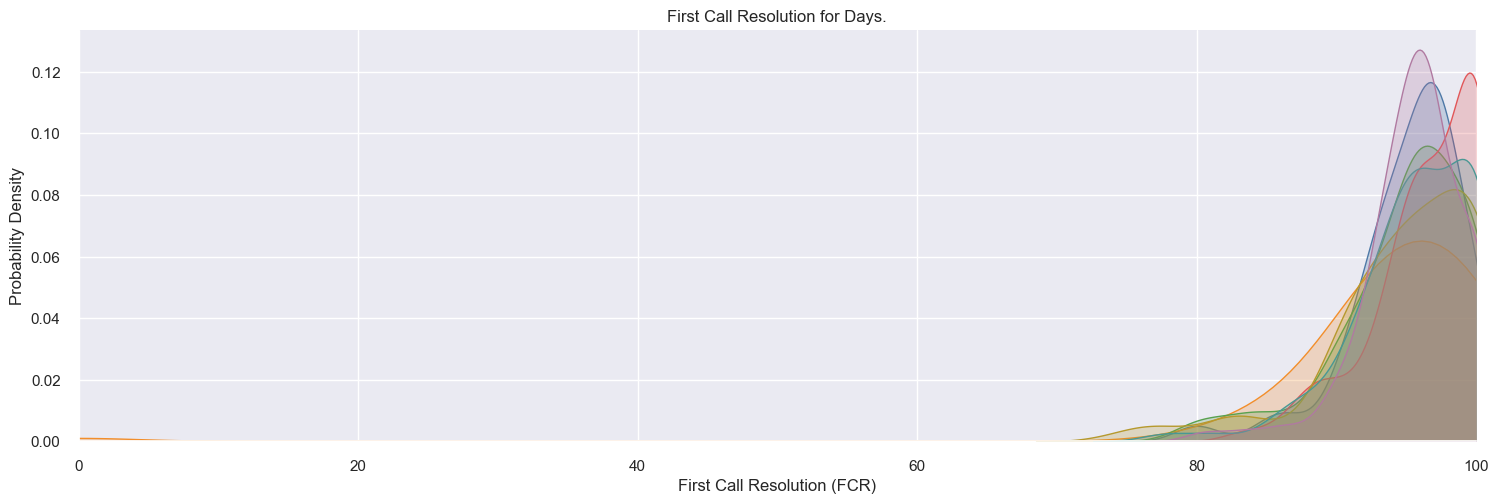

In [47]:
# Visualize the FCR for specific day in the probability density chart.
facet = sns.FacetGrid(dataset, aspect = 3, height=5)
facet.map(sns.kdeplot, 'Sunday', shade = True, color='#4E79A7')
facet.map(sns.kdeplot, 'Monday', shade = True, color='#F28E2B')
facet.map(sns.kdeplot, 'Tuesday', shade = True, color='#59A14F')
facet.map(sns.kdeplot, 'Wednesday', shade = True, color='#E15759')
facet.map(sns.kdeplot, 'Thursday', shade = True, color='#B6992D')
facet.map(sns.kdeplot, 'Friday', shade = True, color='#499894')
facet.map(sns.kdeplot, 'Saturday', shade = True, color='#B07AA1')
facet.set(xlim = (0, dataset['Thursday'].max()))
facet.add_legend()
plt.title('First Call Resolution for Days.', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.xlabel('First Call Resolution (FCR)', fontsize=12)
plt.show()

### **Step 12: Visualize the Dispersion of FCR Values and Identify Outliers 📊**

We visualize the **First Call Resolution (FCR)** dispersion across each day of the week and identify outliers using a **boxplot** combined with a **swarmplot**.

#### **📘 Explanation:**

- **Boxplot**: Displays the distribution of **FCR** values for each day, showing the median, interquartile range, and outliers. It provides an overview of the data spread and detects any extreme values.

- **Swarmplot**: Adds individual data points on top of the boxplot. This gives a clearer view of the exact distribution and outliers for each day of the week.

- **Color Set**: Each day is assigned a unique color, matching the **probability density chart** from the previous step:
  - **Sunday**: `#4E79A7`
  - **Monday**: `#F28E2B`
  - **Tuesday**: `#59A14F`
  - **Wednesday**: `#E15759`
  - **Thursday**: `#B6992D`
  - **Friday**: `#499894`
  - **Saturday**: `#B07AA1`

#### **🔑 Key Concepts:**
- **Boxplot**: Visualizes the spread and outliers in data by showing quartiles and median.
- **Swarmplot**: Displays individual data points to highlight the distribution and any extreme values.
- **Color Palette**: Matches the colors used in the previous visualizations for consistency.

#### **✅ Result:**
You will see a **boxplot** showing how **FCR** values are distributed for each day of the week. The **swarmplot** will show individual data points, with outliers appearing outside the box. The color scheme will differentiate the days for clarity.


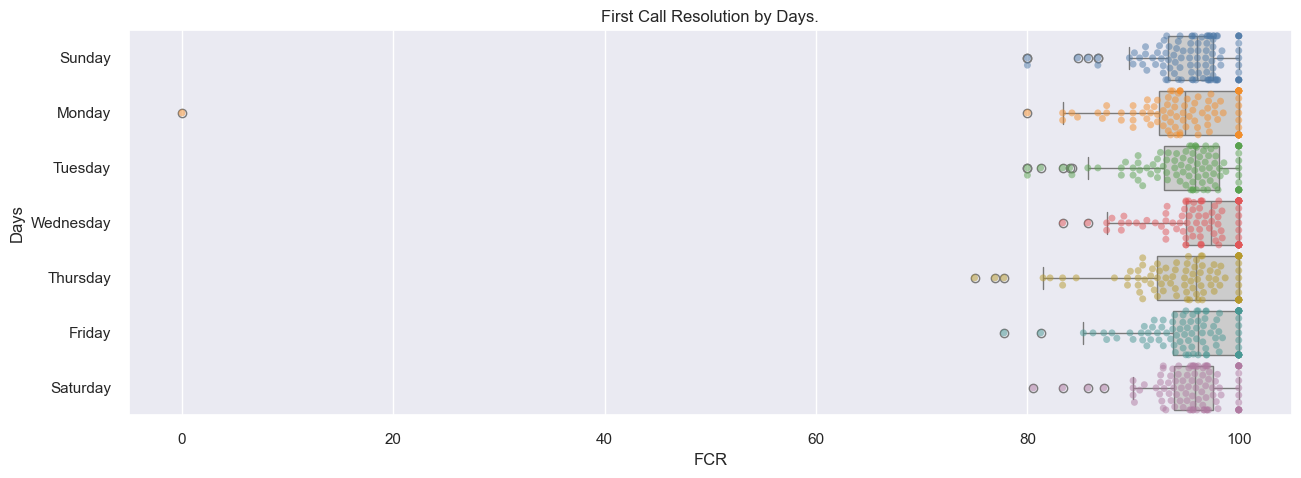

In [48]:
# Visualize the dispersion of FCR values in a given day and identify the outliers.

# Create a color set that matches the probability density chart.
my_pal = {'Sunday': '#4E79A7','Monday': '#F28E2B', 'Tuesday': '#59A14F', 'Wednesday': '#E15759', 'Thursday': '#B6992D', 'Friday': '#499894', 'Saturday': '#B07AA1'}

# Generate a boxplot using Seaborn.
dataset_boxplot = pd.DataFrame(data = dataset, columns = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.figure(figsize=(15,5))
sns.boxplot(x="value", y="variable", data=pd.melt(dataset_boxplot), color='#cccccc')
sns.swarmplot(x="value", y="variable", data=pd.melt(dataset_boxplot), palette=my_pal, alpha=0.5)
plt.title('First Call Resolution by Days.', fontsize=12)
plt.ylabel('Days', fontsize=12)
plt.xlabel('FCR', fontsize=12)
plt.show()

### **Step 13: List Available Models in PyCaret Regression 📋🤖**

After setting up the regression environment using `setup()` in PyCaret, we proceed to explore the available regression models by calling the `models()` function. This function provides a list of models that you can use for training and comparison.

####  **🔑Explanation:**
- **Model Availability**: The `models()` function lists all available regression algorithms, making it easy to choose the best one for your task.
- **Ease of Comparison**: By having multiple models listed, you can quickly compare their performance on your data without manually setting up each one.
- **Predefined Implementations**: PyCaret includes predefined implementations of various regression algorithms, such as Linear Regression, Decision Trees, Random Forests, and more, saving time in coding and setup.

#### **📚 Key Concepts:**
- **Regression**: A type of supervised learning where the goal is to predict continuous numerical values.
- **PyCaret Setup**: `setup()` is used to initialize the environment, perform data preprocessing, and prepare the dataset for modeling.
- **`models()` Function**: This function in PyCaret allows you to view all the regression algorithms available in the setup environment, helping you to easily select models for further training or comparison.

#### **📈 Result:**
- After executing the `models()` function, you will see a table listing the regression models available in PyCaret. You can then proceed to select models for comparison or training in the next steps of your workflow.


In [67]:
# Importing the required libraries
from pycaret.regression import setup
from sklearn.datasets import make_regression
import pandas as pd

# Step 1: Create a sample regression dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Convert to DataFrame for PyCaret
dataset = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, 6)])
dataset['target'] = y

# Step 2: Set up PyCaret regression environment
reg_setup = setup(data=dataset, target='target', session_id=42)

# You should now see the setup output, which includes information about the data, preprocessing, and transformation steps.


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(100, 6)"
4,Transformed data shape,"(100, 6)"
5,Transformed train set shape,"(70, 6)"
6,Transformed test set shape,"(30, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


### **Step 14: Setup PyCaret Regression Environment ⚙️**
We set up the **PyCaret** environment with necessary transformations, feature selections, and preprocessing steps.

#### **📘 Explanation:**
- **setup()**: Initializes the regression experiment by preparing the data.
- **target**: The column we want to predict (**Actual Value**).
- **session_id**: Ensures reproducibility by fixing the random seed.
- **transformation=True**: Applies power transformations to stabilize variance.
- **normalize=False**: No normalization is applied to the data.
- **train_size=0.75**: 75% of data is used for training.
- **numeric_features**: Specifies which features are treated as numeric.
- **remove_outliers=True**: Removes extreme values that can affect the model.
- **outliers_threshold=0.05**: Sets the threshold for removing outliers.
- **remove_multicollinearity=True**: Drops highly correlated features to avoid redundancy.
- **multicollinearity_threshold=0.9**: Defines correlation limit.
- **feature_selection=True**: Automatically selects the best features.
- **ignore_features**: Ignores the **Agent_ID** column during training.
- **polynomial_features=True**: Generates polynomial features to capture non-linear patterns.
- **feature_selection_method='classic'**: Uses classic feature selection methods.
- **pca=True**: Applies Principal Component Analysis (PCA) for dimensionality reduction.
- **use_gpu=False**: Disables GPU usage to avoid compatibility errors.
- **n_jobs=1**: Limits to one CPU core to prevent multiprocessing issues.

#### **🔑 Key Concepts:**
- **Data Transformation**: Stabilizes variance for better model performance.
- **Outlier Removal**: Improves data quality by eliminating extreme values.
- **Feature Engineering**: Enhances model learning by adding polynomial features.
- **Dimensionality Reduction (PCA)**: Reduces overfitting and speeds up training.

#### **✅ Result:**
The dataset is now fully preprocessed and ready for model comparison and training with PyCaret. 🚀


In [51]:
from pycaret.regression import setup

# Setup PyCaret Regression with necessary transformations and settings
reg_fcr = setup(data=dataset,
                target='Actual Value',
                session_id=786,
                transformation=True,
                normalize=False,
                train_size=0.75,
                numeric_features=['Sunday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'Friday',
                                  'Total number of calls', 'CSat', 'total coaching', 'total coaching improved', 'FCR Week before'],
                remove_outliers=True,
                outliers_threshold=0.05,
                remove_multicollinearity=True,
                multicollinearity_threshold=0.9,
                feature_selection=True,
                ignore_features=['Agent_ID'],
                polynomial_features=True,
                feature_selection_method='classic',
                pca=True,
                use_gpu=False,  # Disable GPU if there's an issue with it
                n_jobs=1)  # Limit to one core to avoid subprocess errors


,Description,Value
0,Session id,786
1,Target,Actual Value
2,Target type,Regression
3,Original data shape,"(102, 19)"
4,Transformed data shape,"(98, 4)"
5,Transformed train set shape,"(72, 4)"
6,Transformed test set shape,"(26, 4)"
7,Ignore features,1
8,Numeric features,12
9,Categorical features,2


### **Step 15: Load and Display Available Regression Models 📋**
We initialize the setup again and list all available regression models in PyCaret.

#### **📘 Explanation:**
- **from pycaret.regression import \***: Imports all necessary regression functions from PyCaret.
- **setup()**: Prepares the dataset for model training (specifying the target column as **Actual Value**).
- **models()**: Lists all the regression models available in PyCaret along with their IDs.

#### **🔑 Key Concepts:**
- **setup()**: Must always be called before training or comparing models.
- **models()**: Helps quickly view all model options to choose the best one for your problem.

#### **✅ Result:**
You will see a table showing all available regression models in PyCaret along with important details like model ID, name, and reference. 📊


In [52]:
from pycaret.regression import *  # Make sure to import the regression module

# Initialize setup with your dataset
regression_setup = setup(data=dataset, target='Actual Value', session_id=786)

# Now you can call the models function
available_models = models()

,Description,Value
0,Session id,786
1,Target,Actual Value
2,Target type,Regression
3,Original data shape,"(102, 19)"
4,Transformed data shape,"(102, 19)"
5,Transformed train set shape,"(71, 19)"
6,Transformed test set shape,"(31, 19)"
7,Numeric features,16
8,Categorical features,2
9,Preprocess,True


### **Step 16: View List of Available Regression Models in PyCaret 📄**
We use the **models()** function to display all the regression models PyCaret can work with.

#### **📘 Explanation:**
- **models()**: Shows a list of all available regression models along with their ID, model name, and reference paper.
- **Model IDs**: These IDs can later be used to include or exclude specific models during training, comparison, or tuning.

#### **🔑 Key Concepts:**
- **models()**: Helpful to know what options are available for building your regression model.

#### **✅ Result:**
You will see a table listing all supported regression models, making it easier to decide which models you want to train or compare. 🏗️


In [53]:
# Below is a list of models that Pycaret can use for regression. The ID for each regression can be used to include or exclude models for various functions.
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### **Step 17: Compare and Select Top 5 Regression Models 📊**
We compare multiple regression models and select the **top 5** models based on their performance to use later for **stacking** and **blending**.

#### **📘 Explanation:**
- **compare_models()**: Compares all available models automatically.
- **n_select=5**: Selects the top 5 best-performing models.
- **exclude=['ransac', 'knn']**: Excludes RANSAC and KNN models from the comparison.
- **sort='RMSE'**: Models are ranked based on the lowest **Root Mean Squared Error (RMSE)**.
- **fold=5**: Performs 5-fold cross-validation (instead of the default 10 folds).

#### **🔑 Key Concepts:**
- **compare_models()**: Quickly evaluates and ranks multiple models.
- **n_select**: Allows selecting a specific number of top models.
- **exclude**: Skips unwanted models during comparison.

#### **✅ Result:**
You will get the **top 5 models** with the best RMSE scores, ready to be used for stacking or blending. 🌟


In [54]:
# We can do a compare_models() function without assigning it to a variable. However, we have top 5 models selected using n_select and assigning it to top5 variable. We plan to use this for Stacking and Blending purposes. We have excluded 'RANSAC' (Random Sample Consensus) and 'KNN' (K-Nearest Neighbor) models and have adjusted the default fold value from 10 to 5.
top5 = compare_models(n_select=5, exclude=(['ransac', 'knn']), sort='RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,4.7088,38.3752,6.1628,-0.0874,0.0673,0.0518,0.1060
omp,Orthogonal Matching Pursuit,4.7524,38.5575,6.1725,-0.0878,0.0674,0.0523,0.0600
br,Bayesian Ridge,4.7522,38.5607,6.1728,-0.0879,0.0674,0.0523,0.0680
et,Extra Trees Regressor,4.8790,40.3065,6.3131,-0.2150,0.0685,0.0529,0.1740
rf,Random Forest Regressor,4.8885,40.6380,6.3287,-0.2297,0.0686,0.0530,0.2720
ada,AdaBoost Regressor,4.7634,42.5894,6.4764,-0.2781,0.0707,0.0525,0.1180
lightgbm,Light Gradient Boosting Machine,5.1259,45.1109,6.7128,-0.3597,0.0729,0.0561,0.2260
lasso,Lasso Regression,5.2919,48.6663,6.9438,-0.4209,0.0754,0.0578,0.0760
llar,Lasso Least Angle Regression,5.2919,48.6661,6.9438,-0.4209,0.0754,0.0578,0.0640
gbr,Gradient Boosting Regressor,5.0489,50.0055,6.9718,-0.6505,0.0758,0.0547,0.1140


### **Step 18: Display Model Comparison Results in a Sorted Table 📋**
We display the output of **compare_models()** in a clean and sorted format, making it easier to take screenshots for reports.

#### **📘 Explanation:**
- **pull()**: Fetches the last fitted or compared model's result table.
- **sort_values(by='RMSE', ascending=True)**: Sorts the models based on **Root Mean Squared Error (RMSE)** in **ascending** order (best models at the top).

#### **🔑 Key Concepts:**
- **pull()**: Retrieves the comparison results without yellow highlights.
- **Sorting by RMSE**: Ensures models with the lowest RMSE appear first.

#### **✅ Result:**
You get a **clean, sorted table** of models based on RMSE, perfect for reports and presentations. 🌟


In [55]:
# Sometimes you want to include the output of the compare_models() as a screenshot into a report. However, with the yellow highlights it gets difficult to read. Pycaret has thought of that and you can use the pull() function to show the model results in the sort by or ascending order.
pull().sort_values(by='RMSE', ascending=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,4.7088,38.3752,6.1628,-0.0874,0.0673,0.0518,0.106
omp,Orthogonal Matching Pursuit,4.7524,38.5575,6.1725,-0.0878,0.0674,0.0523,0.060
br,Bayesian Ridge,4.7522,38.5607,6.1728,-0.0879,0.0674,0.0523,0.068
et,Extra Trees Regressor,4.8790,40.3065,6.3131,-0.2150,0.0685,0.0529,0.174
rf,Random Forest Regressor,4.8885,40.6380,6.3287,-0.2297,0.0686,0.0530,0.272
ada,AdaBoost Regressor,4.7634,42.5894,6.4764,-0.2781,0.0707,0.0525,0.118
lightgbm,Light Gradient Boosting Machine,5.1259,45.1109,6.7128,-0.3597,0.0729,0.0561,0.226
llar,Lasso Least Angle Regression,5.2919,48.6661,6.9438,-0.4209,0.0754,0.0578,0.064
lasso,Lasso Regression,5.2919,48.6663,6.9438,-0.4209,0.0754,0.0578,0.076
gbr,Gradient Boosting Regressor,5.0489,50.0055,6.9718,-0.6505,0.0758,0.0547,0.114


### **Step 19: Tune the Top 5 Selected Models for Better Performance 🔧**
We tune the top 5 models selected earlier to further optimize their performance based on **RMSE**.

#### **📘 Explanation:**
- **tuned_top5 = []**: Create an empty list to store tuned models.
- **for model in top5**: Loop through each model.
- **tune_model(model, n_iter=120, optimize='RMSE', fold=5)**: Try tuning the model using **120 iterations** to minimize **RMSE**.
- **try-except block**: If tuning is not supported (throws an error), skip tuning and keep the original model.

#### **🔑 Key Concepts:**
- **Model Tuning**: Hyperparameter optimization to improve model accuracy.
- **Exception Handling**: Ensures the code doesn't crash if a model doesn't support tuning.
- **n_iter**: Number of search iterations while tuning.

#### **✅ Result:**
You get a list of **tuned models** (or original models if tuning wasn't possible), ready for further use. 🚀


In [56]:
# Create a list to store tuned models
tuned_top5 = []

# Iterate through top5 models and tune those that support it
for model in top5:
    try:
        tuned_model = tune_model(model, n_iter=120, optimize='RMSE', fold=5)
        tuned_top5.append(tuned_model)
    except ValueError as e:
        print(f"Skipping tuning for {type(model).__name__} - {str(e)}")
        tuned_top5.append(model)  # Add original model if tuning not supported

print("\nTuned models (or original if tuning not supported):")
for model in tuned_top5:
    print(type(model).__name__)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:46:02
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Regressor


Skipping tuning for DummyRegressor - parameter grid for tuning is empty. If passing custom_grid, make sure that it is not empty. If not passing custom_grid, the passed estimator does not have a built-in tuning grid.


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4775,36.5070,6.0421,0.0071,0.0658,0.0490
1,4.9833,41.6225,6.4515,-0.0366,0.0703,0.0554
2,4.2831,42.2171,6.4975,-0.0192,0.0735,0.0491
3,4.6002,24.4202,4.9417,-0.3294,0.0513,0.0474
4,5.4179,48.0209,6.9297,-0.0609,0.0761,0.0606
Mean,4.7524,38.5575,6.1725,-0.0878,0.0674,0.0523
Std,0.4038,7.9550,0.6766,0.1228,0.0088,0.0049


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4789,36.5216,6.0433,0.0067,0.0659,0.0491
1,4.9783,41.5995,6.4498,-0.0360,0.0703,0.0553
2,4.2796,42.2118,6.4971,-0.0191,0.0735,0.0490
3,4.6023,24.4403,4.9437,-0.3305,0.0513,0.0475
4,5.4130,47.9467,6.9244,-0.0593,0.0760,0.0605
Mean,4.7504,38.5440,6.1716,-0.0876,0.0674,0.0523
Std,0.4021,7.9272,0.6744,0.1233,0.0087,0.0049


Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.8473,40.7391,6.3827,-0.1080,0.0694,0.0531
1,4.4524,32.1522,5.6703,0.1993,0.0617,0.0486
2,4.6103,53.1141,7.2879,-0.2823,0.0814,0.0531
3,4.6209,26.2045,5.1190,-0.4265,0.0531,0.0474
4,4.9949,33.6229,5.7985,0.2572,0.0634,0.0547
Mean,4.7052,37.1666,6.0517,-0.0721,0.0658,0.0514
Std,0.1919,9.2191,0.7372,0.2658,0.0094,0.0028


Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4127,33.3912,5.7785,0.0919,0.0632,0.0485
1,4.5186,37.2462,6.1030,0.0724,0.0670,0.0508
2,4.7925,55.8264,7.4717,-0.3478,0.0834,0.0554
3,4.3163,22.2946,4.7217,-0.2137,0.0490,0.0445
4,4.6328,36.5500,6.0457,0.1925,0.0669,0.0520
Mean,4.5346,37.0617,6.0241,-0.0409,0.0659,0.0502
Std,0.1667,10.8069,0.8785,0.2044,0.0110,0.0036


Fitting 5 folds for each of 120 candidates, totalling 600 fits

Tuned models (or original if tuning not supported):
DummyRegressor
OrthogonalMatchingPursuit
BayesianRidge
ExtraTreesRegressor
RandomForestRegressor


### **Step 20: Blend the Top Tuned Models to Create an Ensemble 🚀**
We combine the tuned models using a blending technique to improve prediction accuracy.

#### **📘 Explanation:**
- **blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='RMSE', choose_better=False)**: 
  - Blends all tuned models.
  - 5-fold cross-validation is used.
  - Models are blended to minimize **RMSE**.
  - **choose_better=False** keeps the blended model even if not better individually.

#### **🔑 Key Concepts:**
- **Blending**: Combines multiple models' predictions to reduce errors.
- **Ensemble Learning**: Boosts performance by leveraging multiple algorithms.
- **fold=5**: Cross-validation with 5 splits for robust evaluation.

#### **✅ Result:**
You get a **blended ensemble model** that combines the strengths of the top tuned models for better predictions! 🎯


In [57]:
# Blending models is an ensemble method of combining different machine learning algorithms and use a majority vote to build consensus of final prediction values. Let's try building a blending model from our top 5 models and evaluate the results.
blender_specific = blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4314,35.7747,5.9812,0.0270,0.0653,0.0486
1,4.5942,37.3820,6.1141,0.0690,0.0669,0.0511
2,4.2509,45.8524,6.7714,-0.1070,0.0763,0.0491
3,4.5191,23.6291,4.8610,-0.2863,0.0504,0.0465
4,5.0756,41.2539,6.4229,0.0886,0.0708,0.0566
Mean,4.5742,36.7784,6.0301,-0.0417,0.0659,0.0504
Std,0.2756,7.4383,0.6450,0.1400,0.0087,0.0034


### **Step 21: View the Blended Model Parameters 🔍**
We display the parameters and structure of the blended model created in the previous step.

#### **📘 Explanation:**
- **blender_specific**:
  - Shows the detailed setup, parameters, and the underlying models used in the blending.
  - Helps in understanding how the ensemble was constructed.

#### **🔑 Key Concepts:**
- **Model Parameters**: Configuration settings used by the blended model.
- **Model Insights**: Viewing parameters gives transparency into how the model operates.

#### **✅ Result:**
You will see a **detailed summary** of the blended model, including which models were combined and their settings. 📋✨


In [58]:
# Below is a view of the model parameters.
blender_specific

VotingRegressor(estimators=[('Dummy Regressor', DummyRegressor()),
                            ('Orthogonal Matching Pursuit',
                             OrthogonalMatchingPursuit()),
                            ('Bayesian Ridge',
                             BayesianRidge(alpha_1=0.3, alpha_2=0.1,
                                           lambda_1=0.2, lambda_2=1e-07)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(max_depth=11,
                                                 min_impurity_decrease=0.3,
                                                 min_samples_leaf=2,
                                                 min_samples_split=5,
                                                 n_estimators=200, n_jobs=-1,
                                                 random_state=786)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(criterion='absolute_error',
         

### **Step 22: Build a Stacked Model Using Top Tuned Models 🏗️**
We create a **stacked model** using the top tuned models, with one model acting as the meta-learner.

#### **📘 Explanation:**
- **Stacking**:
  - Combines multiple base models to improve predictive performance.
  - A **meta-model** is trained to aggregate the outputs of base models.

- **Parameters**:
  - **estimator_list=tuned_top5[1:]**: Base models (excluding the first one).
  - **meta_model=tuned_top5[0]**: The first model acts as the meta-learner.
  - **fold=5**: 5-fold cross-validation for reliable evaluation.
  - **optimize='RMSE'**: Optimize for Root Mean Squared Error.
  - **choose_better=False**: No auto-replacement with better models.

#### **🔑 Key Concepts:**
- **Base Models**: Models stacked at the first level.
- **Meta Model**: Learns how to best combine base model predictions.

#### **✅ Result:**
You will get a **stacked ensemble model** built from the top-tuned models for better overall predictions. 🎯🚀


In [59]:
# Stacking models is an ensemble method of using meta learning, where a meta model is created using multiple base estimators to generate the final prediction. Let's try building a stacking model from our top 5 models and evaluate the results.
stacker_specific = stack_models(estimator_list=tuned_top5[1:], meta_model=tuned_top5[0], fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5150,36.9948,6.0823,-0.0062,0.0663,0.0495
1,4.8399,41.2688,6.4241,-0.0278,0.0701,0.0540
2,4.2687,42.4171,6.5128,-0.0240,0.0736,0.0489
3,4.6505,24.9199,4.9920,-0.3566,0.0518,0.0480
4,5.2700,46.2755,6.8026,-0.0223,0.0748,0.0589
Mean,4.7088,38.3752,6.1628,-0.0874,0.0673,0.0518
Std,0.3367,7.3495,0.6289,0.1348,0.0083,0.0041


### **Step 23: Generate Plots for Cook's Distance and t-SNE Manifold 📊**
We use PyCaret’s **plot_model()** function to generate two key plots: **Cook’s Distance Outliers** and **t-SNE Manifold** charts for model evaluation.

#### **📘 Explanation:**
- **Cook's Distance**: Identifies outliers in the dataset by measuring influence on the regression model.
- **t-SNE Manifold**: Visualizes high-dimensional data in a 2D or 3D space, showing how well the data clusters.

- **Parameters**:
  - **plot='cooks'**: Plot Cook’s Distance Outliers.
  - **plot='manifold'**: Plot t-SNE Manifold.
  - **save=True**: Save the plots as an image file.
  - **verbose=False**: Suppresses additional output.
  - **scale=1.1**: Rescale the plots for better presentation.

#### **🔑 Key Concepts:**
- **Cook’s Distance**: Used to detect influential data points.
- **t-SNE**: Non-linear dimensionality reduction technique for visualization.

#### **✅ Result:**
You will see the **Cook’s Distance** and **t-SNE Manifold** plots, helping identify outliers and visualize data relationships. 📈💡


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(100, 6)"
4,Transformed data shape,"(100, 6)"
5,Transformed train set shape,"(70, 6)"
6,Transformed test set shape,"(30, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0764,0.0100,0.0960,1.0000,0.0101,0.0837,0.7920
lar,Least Angle Regression,0.0764,0.0100,0.0960,1.0000,0.0101,0.0837,0.0220
br,Bayesian Ridge,0.0764,0.0100,0.0960,1.0000,0.0101,0.0838,0.0280
par,Passive Aggressive Regressor,0.0960,0.0167,0.1216,1.0000,0.0118,0.0911,0.0210
huber,Huber Regressor,0.0761,0.0097,0.0946,1.0000,0.0099,0.0770,0.0310
lasso,Lasso Regression,1.9830,6.7537,2.4863,0.9996,0.0388,0.4342,0.0140
ridge,Ridge Regression,2.2263,7.7316,2.6659,0.9996,0.0617,0.5152,0.0160
llar,Lasso Least Angle Regression,1.9830,6.7532,2.4862,0.9996,0.0388,0.4342,0.0180
en,Elastic Net,43.9314,2942.5579,52.4517,0.8401,0.7463,6.8615,0.0130
et,Extra Trees Regressor,46.5465,3862.7658,60.0935,0.7825,0.7710,15.9122,0.0760


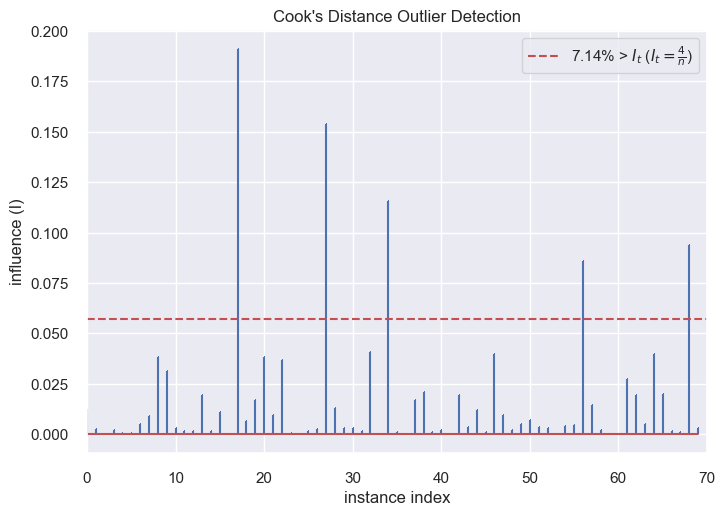

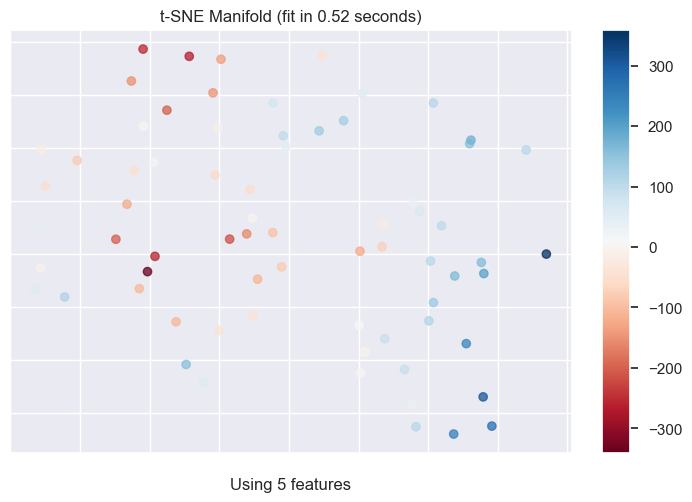

In [70]:
# Import required functions
from pycaret.regression import setup, compare_models, plot_model

# Setup the environment correctly
reg_setup = setup(data=dataset, target='target', session_id=42)

# Train the best model
best_model = compare_models()

# Now plot directly
plot_model(best_model, plot='cooks')
plot_model(best_model, plot='manifold')


### **Step 24: Compare Blend and Stack Models with Side-by-Side Plots 📊**
We use **plot_model()** to generate side-by-side plots for the **Residuals**, **Prediction Error**, and **Cross Validation (learning)** charts to compare the **Blend** and **Stack** models.

#### **📘 Explanation:**
- **Residuals**: Shows the difference between observed and predicted values to analyze model performance.
- **Prediction Error**: Displays the residuals of predictions to help identify patterns or errors.
- **Learning**: Provides insight into the model’s learning curve over the training process.

- **Parameters**:
  - **plot='residuals'**: Residuals chart for model error analysis.
  - **plot='error'**: Prediction error chart for comparison.
  - **plot='learning'**: Learning curve to visualize model training performance.
  - **save=True**: Save the plots as images.
  - **verbose=False**: Suppress extra output.
  - **scale=1.1**: Rescale the plots for better visualization.

#### **🔑 Key Concepts:**
- **Residuals**: Evaluates the fit of the model by checking prediction errors.
- **Prediction Error**: Highlights discrepancies between predictions and actual results.
- **Learning Curve**: Tracks the improvement of the model over time during training.

#### **✅ Result:**
You will see side-by-side comparisons of the **Residuals**, **Prediction Error**, and **Learning** plots for both **Blend** and **Stack** models, helping you evaluate and compare their performance. 📉📈


In [92]:
# Import necessary libraries first
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Print Python and package versions to help with debugging
import sys
print(f"Python version: {sys.version}")
pd_version = pd.__version__
print(f"Pandas version: {pd_version}")

# Load dataset from URL
url = 'https://raw.githubusercontent.com/aliagowani/Pycaret_2.1_Regression_EmployeePerformance/master/employee_performance.csv'
data = pd.read_csv(url)

# Print the first few rows to inspect the data
print("First 5 rows of the dataset:")
print(data.head())

# Print all column names to identify the target column
print("\nAvailable columns in the dataset:")
print(data.columns.tolist())

# Standardize column names - replace spaces with underscores
data.columns = [col.replace(' ', '_') for col in data.columns]
print("\nStandardized column names:")
print(data.columns.tolist())

# Identify target column (looking for performance-related columns)
target_columns = [col for col in data.columns if 'performance' in col.lower()]
if target_columns:
    target_column = target_columns[0]
    print(f"\nUsing '{target_column}' as the target column")
else:
    # If no performance column, use the last numeric column
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    target_column = numeric_cols[-1]
    print(f"\nNo performance column found. Using '{target_column}' as the target column")

# Split data into features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Try to use scikit-learn directly if PyCaret is causing issues
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# If PyCaret is causing issues, we'll use scikit-learn directly
try:
    # First attempt: Try to use PyCaret with explicit version check
    from pycaret.utils import version
    pycaret_version = version()
    print(f"PyCaret version: {pycaret_version}")
    
    from pycaret.regression import setup, create_model, compare_models, plot_model, predict_model, finalize_model
    
    # Set up PyCaret
    reg1 = setup(
        data=data,
        target=target_column,
        session_id=123,
        normalize=True,
        transformation=True,
        log_experiment=True,
        silent=True,  # Reduce verbosity
        experiment_name='employee_performance'
    )
    
    # Compare models to find the best one
    best_model = compare_models()
    
    # Finalize the model
    final_model = finalize_model(best_model)
    
    # Generate predictions
    predictions = predict_model(final_model, data=X_test)
    print("\nFirst few predictions using PyCaret:")
    print(predictions.head())
    
except Exception as e:
    print(f"\nPyCaret error: {e}")
    print("Falling back to scikit-learn...")
    
    # Fallback: Use scikit-learn directly
    # Let's try several common regression models
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression, Ridge
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    
    # Preprocess data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=123)
    }
    
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R²": r2}
        print(f"{name} - MSE: {mse:.4f}, R²: {r2:.4f}")
    
    # Find the best model
    best_model_name = max(results, key=lambda k: results[k]["R²"])
    print(f"\nBest model: {best_model_name} with R² = {results[best_model_name]['R²']:.4f}")
    
    # Feature importance for Random Forest
    if "Random Forest" in models:
        rf_model = models["Random Forest"]
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': rf_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\nTop 10 most important features:")
        print(feature_importance.head(10))
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
        plt.title('Feature Importance (Random Forest)')
        plt.tight_layout()
        plt.show()

print("\nAnalysis complete!")

Python version: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
Pandas version: 1.5.3
First 5 rows of the dataset:
   Agent_ID      Friday      Monday   Saturday     Sunday    Thursday  \
0    384091  100.000000   90.000000  90.000000  96.145833  100.000000   
1    369185   94.000000  100.000000  96.865528  96.865528   96.103896   
2    360854   94.444444   80.000000  92.936027  92.936027  100.000000   
3    374407  100.000000   95.000000  96.630435  96.630435   92.500000   
4    372496   96.875000   95.833333  94.278101  94.278101   83.333333   

     Tuesday   Wednesday          Site Function_Field  tenure  \
0  96.875000  100.000000  Kuala Lumpur          Agent      33   
1  95.890411   98.333333  Kuala Lumpur          Agent      33   
2  93.939394   96.296296  Kuala Lumpur          Agent      32   
3  95.652174  100.000000  Kuala Lumpur          Agent      32   
4  95.348837  100.000000  Kuala Lumpur          Agent      29   

   Total number of cal

ValueError: could not convert string to float: 'Kuala Lumpur'

### **Step 25: Generate Predictions Using the Blended Model 🔮**
We use the **predict_model()** function to generate predicted values using the **Blended Model**.

#### **📘 Explanation:**
- **predict_model()**: A PyCaret function to generate predictions from the trained model.
- **blender_specific**: The previously trained blended model, which is used for making predictions.

#### **🔑 Key Concepts:**
- **Prediction Generation**: The function uses the trained model to predict outcomes for new data.
- **Blended Model**: An ensemble method combining multiple models to improve prediction accuracy.

#### **✅ Result:**
The predictions generated by the **Blended Model** will be stored in the **pred_tunded_blender** variable, which you can use for further analysis or evaluation. 📊


In [62]:
# We can execute the predict_model() function to use the model to generate the predicted values.
pred_tunded_blender = predict_model(blender_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3.9579,20.2987,4.5054,-0.1438,0.0472,0.0413


### **Step 26: Generate Predictions Using the Stacked Model 🔮**
We use the **predict_model()** function to generate predicted values using the **Stacked Model**.

#### **📘 Explanation:**
- **predict_model()**: A PyCaret function used to generate predictions from the trained model.
- **stacker_specific**: The previously trained stacked model, which is used for making predictions.

#### **🔑 Key Concepts:**
- **Prediction Generation**: The function applies the trained stacked model to new data and returns the predicted values.
- **Stacked Model**: An ensemble method that uses multiple models in a layered structure to improve prediction accuracy.

#### **✅ Result:**
The predictions generated by the **Stacked Model** will be stored in the **pred_tunded_stacker** variable, ready for further analysis or evaluation. 📊


In [63]:
# We can execute the predict_model() function to use the model to generate the predicted values.
pred_tunded_stacker = predict_model(stacker_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,4.0388,20.4397,4.5210,-0.1517,0.0472,0.0420


### **Step 27: Install/Upgrade Gradio 📦**
We use the **pip** command to install or upgrade the **Gradio** library.

#### **📘 Explanation:**
- **pip**: A package manager for Python used to install and manage libraries and dependencies.
- **sys.executable**: Refers to the Python executable, ensuring the command is run with the current Python environment.
- **Gradio**: A library used to quickly create and share machine learning web apps.

#### **🔑 Key Concepts:**
- **Gradio Installation**: The command installs the latest version of Gradio, or upgrades it if it's already installed.

#### **✅ Result:**
Once the command runs successfully, **Gradio** will be installed or upgraded to the latest version in your environment. 🛠️


In [85]:
!C:\Users\Hello\myenv\Scripts\python.exe -m pip install --upgrade pip

In [86]:
import sys
!{sys.executable} -m pip install gradio --upgrade

### **Step 28: Create Gradio App for Predictions 📱**
In this step, we use **Gradio** to create a user-friendly web interface for our model predictions.

#### **📘 Explanation:**
- **Gradio**: A Python library that allows you to create and share machine learning demos easily.
- **make_prediction**: This function takes multiple input parameters (like employee data) and uses the **blender_specific** model to generate predictions.
- **gr.Interface**: Creates the web interface to interact with the model by taking inputs from users and displaying the prediction results.

#### **🔑 Key Concepts:**
- **input_data**: A Pandas DataFrame is created from the user inputs and matched with the model’s expected feature names.
- **blender_specific.predict**: This line uses the trained model to predict the employee performance.
- **Gradio Interface**: It’s set up with different input fields (numbers and dropdowns) and a prediction output.

#### **✅ Result:**
A **Gradio web app** is created, allowing users to input values for various features and get an employee performance prediction. 🖥️✨


In [65]:
!pip install gradio
!pip install --upgrade gradio
import gradio as gr
import pandas as pd

# Define the prediction function using the `blender_specific` model
def make_prediction(Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday,
                    Site, Function_Field, tenure, Total_number_of_calls, Assistance,
                    Recommend, CSat, total_coaching, total_coaching_improved, FCR_Week_before):
    
    input_data = pd.DataFrame({
        'Friday': [Friday],
        'Monday': [Monday],
        'Saturday': [Saturday],
        'Sunday': [Sunday],
        'Thursday': [Thursday],
        'Tuesday': [Tuesday],
        'Wednesday': [Wednesday],
        'Site': [Site],
        'Function_Field': [Function_Field],
        'tenure': [tenure],
        'Total number of calls': [Total_number_of_calls],
        'Assistance': [Assistance],
        'Recommend': [Recommend],
        'CSat': [CSat],
        'total coaching': [total_coaching],
        'total coaching improved': [total_coaching_improved],
        'FCR Week before': [FCR_Week_before]
    })

    # Ensure correct data types
    input_data = input_data.astype({
        'Friday': 'float32',
        'Monday': 'float32',
        'Saturday': 'float32',
        'Sunday': 'float32',
        'Thursday': 'float32',
        'Tuesday': 'float32',
        'Wednesday': 'float32',
        'Site': 'category',
        'Function_Field': 'category',
        'tenure': 'int8',
        'Total number of calls': 'int32',
        'Assistance': 'float32',
        'Recommend': 'float32',
        'CSat': 'float32',
        'total coaching': 'int8',
        'total coaching improved': 'int8',
        'FCR Week before': 'float32'
    })

    # Align with model input
    input_data = input_data.reindex(columns=blender_specific.feature_names_in_, fill_value=0)

    # Make prediction
    prediction = blender_specific.predict(input_data)
    return prediction[0]

# Create Gradio interface
iface = gr.Interface(
    fn=make_prediction,
    inputs=[
        gr.Number(value=95.0, label="Friday"),
        gr.Number(value=90.0, label="Monday"),
        gr.Number(value=92.0, label="Saturday"),
        gr.Number(value=94.0, label="Sunday"),
        gr.Number(value=93.0, label="Thursday"),
        gr.Number(value=91.0, label="Tuesday"),
        gr.Number(value=92.0, label="Wednesday"),
        gr.Dropdown(choices=["Kuala Lumpur", "Santiago"], value="Kuala Lumpur", label="Site"),
        gr.Dropdown(choices=["Agent"], value="Agent", label="Function_Field"),
        gr.Number(value=10, label="tenure"),
        gr.Number(value=150, label="Total number of calls"),
        gr.Number(value=95.0, label="Assistance"),
        gr.Number(value=94.0, label="Recommend"),
        gr.Number(value=4.8, label="CSat"),
        gr.Number(value=1, label="total coaching"),
        gr.Number(value=1, label="total coaching improved"),
        gr.Number(value=90.0, label="FCR Week before")
    ],
    outputs="number",
    title="Employee Performance Prediction",
    description="Enter the values to predict the employee's performance."
)

# Launch the app
iface.launch()


  Using cached gradio-5.27.0-py3-none-any.whl.metadata (16 kB)
  Using cached gradio_client-1.9.0-py3-none-any.whl.metadata (7.1 kB)
Using cached gradio-5.27.0-py3-none-any.whl (54.0 MB)
Using cached gradio_client-1.9.0-py3-none-any.whl (322 kB)

  Attempting uninstall: gradio-client

    Found existing installation: gradio_client 1.8.0

    Uninstalling gradio_client-1.8.0:

      Successfully uninstalled gradio_client-1.8.0

   ---------------------------------------- 0/2 [gradio-client]
  Attempting uninstall: gradio
   ---------------------------------------- 0/2 [gradio-client]
    Found existing installation: gradio 5.25.2
   ---------------------------------------- 0/2 [gradio-client]
   -------------------- ------------------- 1/2 [gradio]
   -------------------- ------------------- 1/2 [gradio]
   -------------------- ------------------- 1/2 [gradio]
   -------------------- ------------------- 1/2 [gradio]
   -------------------- ------------------- 1/2 [gradio]
    Uninstalli

### 📝 **Summary: What You Will Notice After Performing the Lab**

🔍 **Key Insights**  
After completing the PyCaret Regression lab, you will gain hands-on experience with how to automate, compare, and deploy regression models using PyCaret. Specifically, you’ll observe:

- **Automated Model Setup**: You’ll see how PyCaret simplifies the entire machine learning pipeline—data preprocessing, model training, evaluation, and selection—all with minimal code.

- **Efficient Model Comparison**: Using PyCaret’s `compare_models()` function, you can quickly identify the best-performing models across various algorithms, saving valuable time in model selection.

- **Interpretation & Insights**: With built-in tools like `plot_model()` and `evaluate_model()`, you can visually assess model performance, understand feature importance, and analyze diagnostics with ease.

- **Model Finalization & Deployment**: You’ll learn how to finalize the best model, save it, and deploy it through integration with tools like Gradio, which allows for real-time predictions.

🛠 **Hands-On Tools & Visualizations**:  
- **`compare_models()`**: Evaluate multiple regression models to quickly identify top performers.  
- **`plot_model()`**: Visualize model performance with plots like residuals, feature importance, and error distributions.  
- **`evaluate_model()`**: Get an interactive summary of key model diagnostics.  
- **Gradio Integration**: Create a simple UI for testing model predictions in real time.

🧠 **Reflection**:  
- **Speed & Efficiency**: PyCaret accelerates the journey from data to model deployment, making it an excellent tool for rapid prototyping and model experimentation.
  
- **Confidence in Model Selection**: With automatic comparisons and intuitive visual feedback, you can confidently choose the best model and justify your decision.

